In [1]:
import joblib

# Load the model from the file
model_kdd_ada_boost = joblib.load('../artefacts/6/models_kdd_ada_boost.joblib')
model_kdd_decision_tree = joblib.load('../artefacts/6/models_kdd_decision_tree.joblib')
model_kdd_knn = joblib.load('../artefacts/6/models_kdd_knn.joblib')
model_kdd_logistic_regression = joblib.load('../artefacts/6/models_kdd_logistic_regression.joblib')
model_kdd_mlp = joblib.load('../artefacts/6/models_kdd_mlp.joblib')
model_kdd_random_forest = joblib.load('../artefacts/6/models_kdd_random_forest.joblib')
model_kdd_svm = joblib.load('../artefacts/6/models_kdd_svm.joblib')

def load_json(json_path):
    with open(json_path, 'r') as f:
        return json.load(f)

In [2]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
import seaborn as sns
import json
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import time

models = [
    'ada_boost',
    'decision_tree',
    'knn',
    'logistic_regression',
    'mlp',
    'random_forest',
    'svm'
]


def test_dataset(prefix, x, y, y_labels):
    figure, axis = plt.subplots(1, 7, figsize=(5 * 7, 3), sharey=True)

    # set plot resolution
    plt.rcParams['figure.dpi'] = 300

    try:
        results = load_json(
            f'../artefacts/6/results_{prefix}.json')
    except:
        results = {}

    for i, model_name in enumerate(models):
        start = time.time()
        f1, accuracy, precision, recall = 0, 0, 0, 0

        # open model joblib file
        try:
            model = joblib.load(
                f'../artefacts/6/models_{prefix}_{model_name}.joblib')
        except:
            print(f'Error loading model {model_name}')
            continue
        else:

            y_pred = model.predict(x)

            con_mat = confusion_matrix(y.values.argmax(
                axis=1), y_pred.argmax(axis=1))

            # convert confusion matrix to dataframe
            con_mat_df = pd.DataFrame(
                con_mat, index=y_labels, columns=y_labels)

            sns.heatmap(con_mat_df, annot=True, fmt='g', ax=axis[i])

            # f1 score from sklearn
            f1 = f1_score(y.values.argmax(axis=1),
                          y_pred.argmax(axis=1), average='weighted')

            # accuracy score from sklearn
            accuracy = accuracy_score(
                y.values.argmax(axis=1), y_pred.argmax(axis=1))

            # precision score from sklearn
            precision = precision_score(y.values.argmax(
                axis=1), y_pred.argmax(axis=1), average='weighted')

            # recall score from sklearn
            recall = recall_score(y.values.argmax(
                axis=1), y_pred.argmax(axis=1), average='weighted')
        end = time.time()

        try:
            results[model_name]['test'] = {
                'f1': f1,
                'accuracy': accuracy,
                'precision': precision,
                'recall': recall,
                'time': end - start
            }
        except:
            results[model_name] = {
                'test': {
                    'f1': f1,
                    'accuracy': accuracy,
                    'precision': precision,
                    'recall': recall,
                    'time': end - start
                }
            }

        # save results to json file
        with open(f'../artefacts/6/results_{prefix}.json', 'w+') as f:
            json.dump(results, f, indent=4)

        axis[i].set_title(f'{model_name}')
        axis[i].set_xlabel('Actual')
        axis[i].set_ylabel('Predicted')

    plt.show()
    return results


KeyboardInterrupt: 

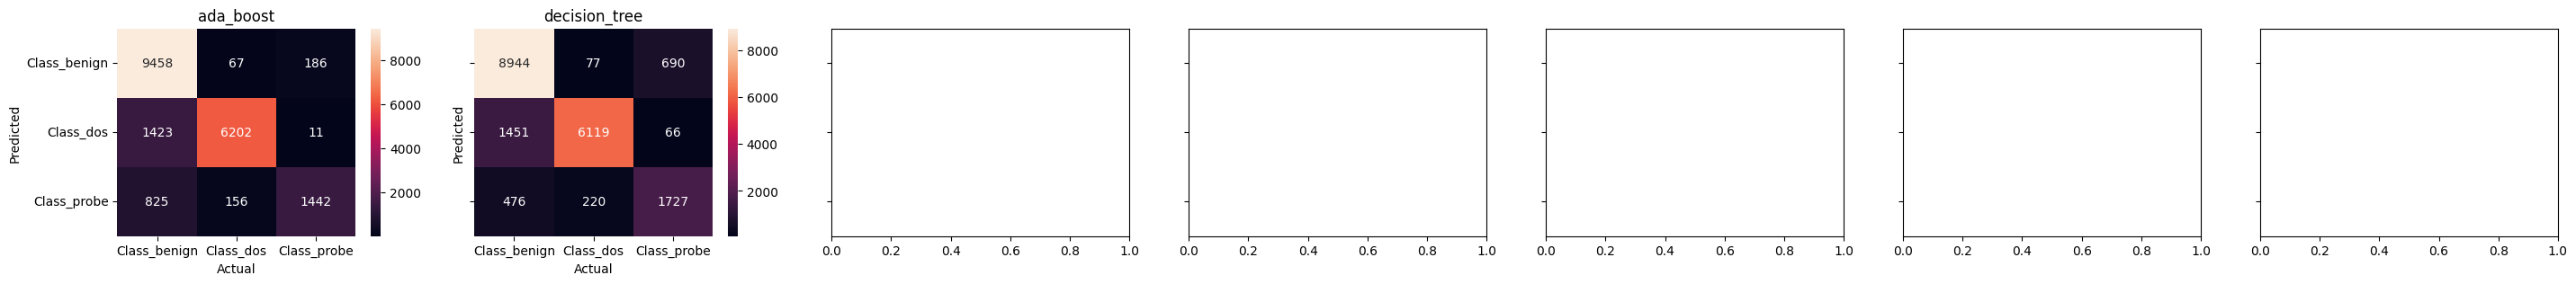

In [3]:
# Load test data for kdd
kdd_test = pd.read_csv('../artefacts/5/kdd_test.csv', index_col=0)

# Separate the features and the target
kdd_x = kdd_test.iloc[:, :-3]
kdd_y = kdd_test.iloc[:, -3:]

kdd_results = test_dataset('kdd', kdd_x, kdd_y, kdd_y.columns.values)


In [4]:
# load test data for unsw
unsw_test = pd.read_csv('../artefacts/5/unsw_test.csv', index_col=0)

# Separate the features and the target
unsw_x = unsw_test.iloc[:, :-2]
unsw_y = unsw_test.iloc[:, -2:]

unsw_results = test_dataset('unsw', unsw_x, unsw_y, unsw_y.columns.values)
